In [2]:
import os
import subprocess
import seaborn as sns  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from __future__ import print_function
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [3]:
#handle auto assignment of best parameters

In [4]:
def get_data():
    if os.path.exists("wednesday_nohb.csv"):
        print("-- wednesday.csv found locally")
    df = pd.read_csv("wednesday_nohb.csv", index_col=False)
    return df

In [5]:
def encode_target(df, target_column):
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)
    return (df_mod, targets)

In [6]:
data = get_data()

-- wednesday.csv found locally


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2818: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
columns = ['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',]
data.drop(columns, inplace=True, axis=1)
print(data.keys())
print(data.shape[0])
print(data.shape[1])

Index([u' Flow Duration', u' Total Fwd Packets', u' Total Backward Packets',
       u'Total Length of Fwd Packets', u' Total Length of Bwd Packets',
       u' Fwd Packet Length Max', u' Fwd Packet Length Min',
       u' Fwd Packet Length Mean', u' Fwd Packet Length Std',
       u'Bwd Packet Length Max', u' Bwd Packet Length Min',
       u' Bwd Packet Length Mean', u' Bwd Packet Length Std', u'Flow Bytes/s',
       u' Flow Packets/s', u' Flow IAT Mean', u' Flow IAT Std',
       u' Flow IAT Max', u' Flow IAT Min', u'Fwd IAT Total', u' Fwd IAT Mean',
       u' Fwd IAT Std', u' Fwd IAT Max', u' Fwd IAT Min', u'Bwd IAT Total',
       u' Bwd IAT Mean', u' Bwd IAT Std', u' Bwd IAT Max', u' Bwd IAT Min',
       u'Fwd PSH Flags', u' Bwd PSH Flags', u' Fwd URG Flags',
       u' Bwd URG Flags', u' Fwd Header Length', u' Bwd Header Length',
       u'Fwd Packets/s', u' Bwd Packets/s', u' Min Packet Length',
       u' Max Packet Length', u' Packet Length Mean', u' Packet Length Std',
       u' Packe

In [8]:
df2, targets = encode_target(data, " Label")


In [9]:
targets

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye'], dtype=object)

In [10]:
df2 = df2.dropna(axis=0, how='any')
df2.isnull().sum().sum()

0

In [11]:
list_unq = (df2.apply(pd.Series.nunique) != 1)
list_unq[list_unq == 0]

 Bwd PSH Flags           False
 Fwd URG Flags           False
 Bwd URG Flags           False
 CWE Flag Count          False
Fwd Avg Bytes/Bulk       False
 Fwd Avg Packets/Bulk    False
 Fwd Avg Bulk Rate       False
 Bwd Avg Bytes/Bulk      False
 Bwd Avg Packets/Bulk    False
Bwd Avg Bulk Rate        False
dtype: bool

In [12]:
df2 = df2.loc[:, df2.apply(pd.Series.nunique) != 1]

In [13]:
features = list(df2.columns[:-2])
y = df2["Target"]
X = df2[features]

0    439972
3    230124
4     10293
1      5796
2      5499
Name: Target, dtype: int64

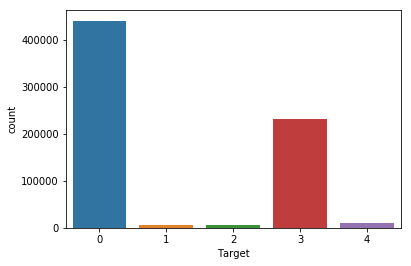

In [14]:
graph = sns.countplot(y ,label="Count")
df2["Target"].value_counts()


In [15]:
del df2
del data

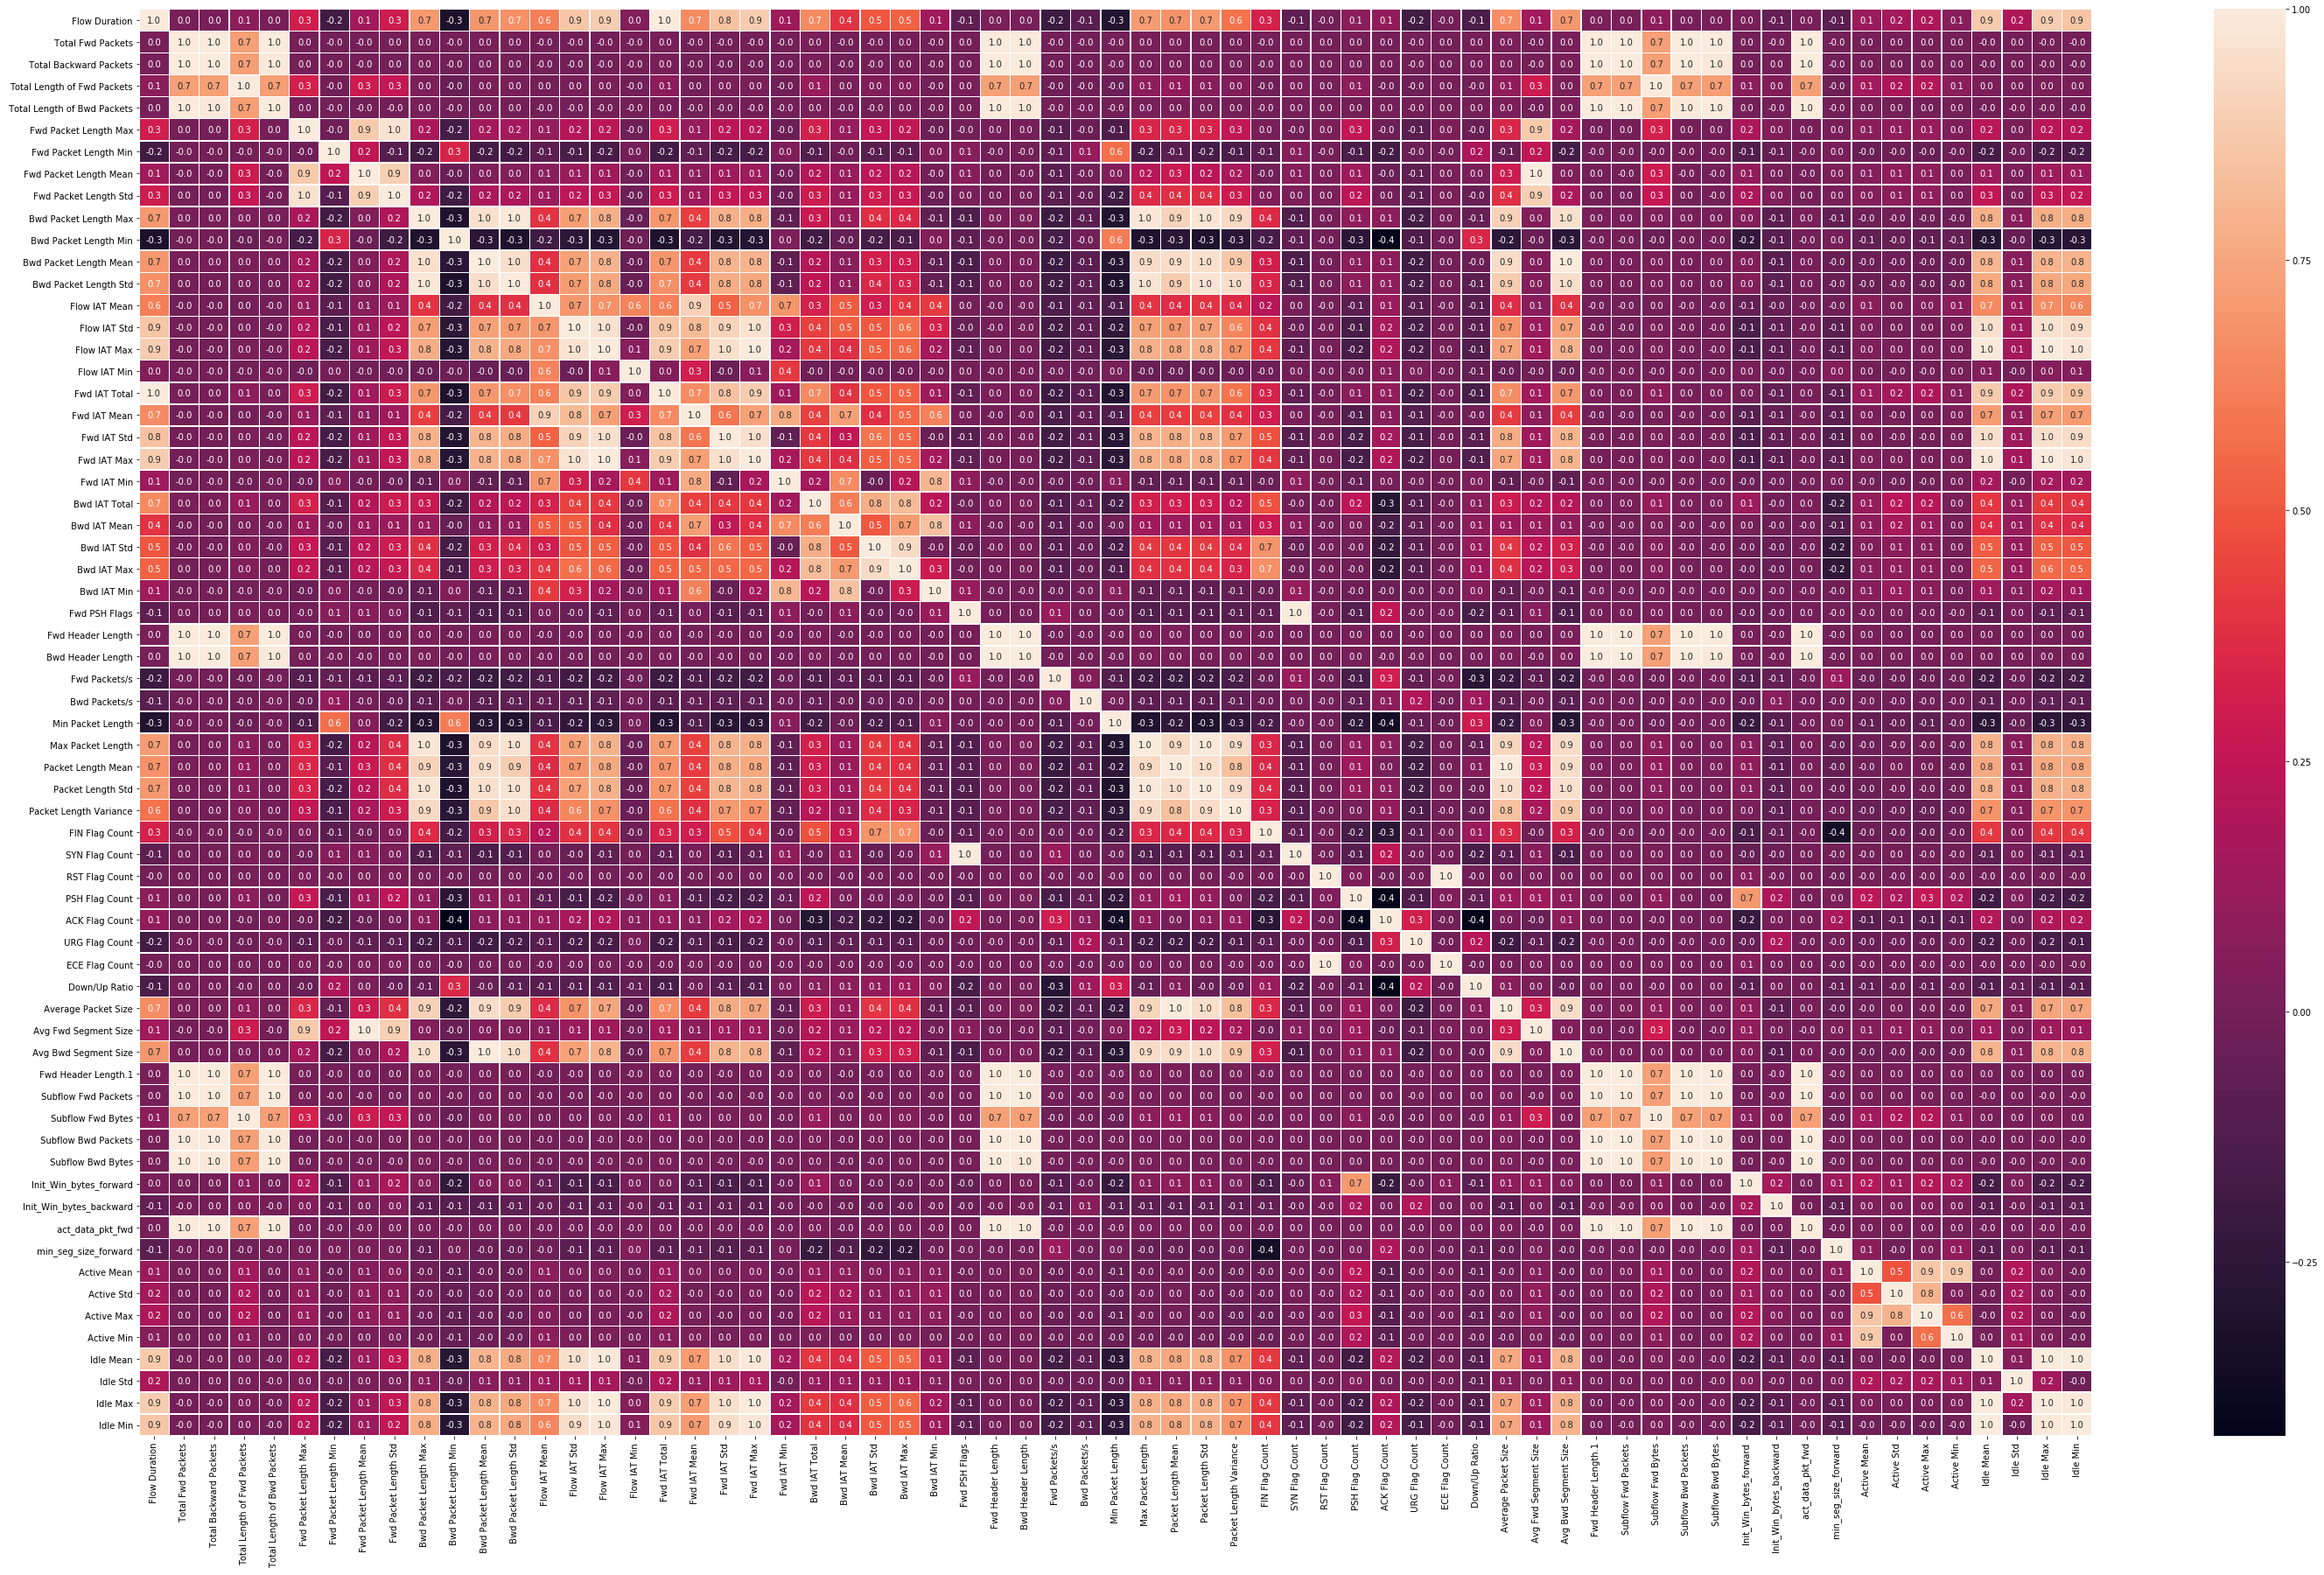

In [16]:
f, ax = plt.subplots(figsize=(50, 30))
sns_plot = sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [17]:
sns_plot.figure.savefig("output_50_30_multiclass.png")

In [18]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [19]:
upper

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Flow Duration,NaN,0.014543,0.013655,0.082087,0.011611,0.305724,0.174027,0.148495,0.294892,0.701896,...,0.011515,0.085809,0.122269,0.160176,0.186715,0.064598,0.874822,0.185202,0.884906,0.858616
Total Fwd Packets,NaN,NaN,0.998920,0.726190,0.995874,0.007977,0.002928,0.000187,0.001113,0.015106,...,0.999751,0.006160,0.006763,0.005916,0.008375,0.004769,0.000675,0.000596,0.000598,0.000757
Total Backward Packets,NaN,NaN,NaN,0.725541,0.992644,0.007735,0.002552,0.000510,0.000736,0.014824,...,0.998433,0.006120,0.005664,0.004234,0.006639,0.004618,0.001087,0.000143,0.001075,0.001125
Total Length of Fwd Packets,NaN,NaN,NaN,NaN,0.720438,0.319886,0.004634,0.289297,0.265274,0.028026,...,0.725829,0.011961,0.145370,0.182480,0.203368,0.067475,0.020994,0.012863,0.022519,0.019504
Total Length of Bwd Packets,NaN,NaN,NaN,NaN,NaN,0.005374,0.002184,0.001594,0.000747,0.014876,...,0.996366,0.005618,0.003749,0.002169,0.003902,0.003365,0.000893,0.000085,0.000904,0.000895
Fwd Packet Length Max,NaN,NaN,NaN,NaN,NaN,NaN,0.017764,0.872895,0.964935,0.170596,...,0.006619,0.011917,0.066367,0.093075,0.113155,0.033710,0.226635,0.025469,0.226532,0.223930
Fwd Packet Length Min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244581,0.103037,0.173934,...,0.002073,0.010756,0.034509,0.028098,0.040309,0.026642,0.153407,0.027097,0.154756,0.151026
Fwd Packet Length Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.889662,0.046238,...,0.000276,0.022846,0.051451,0.087000,0.084593,0.013152,0.130264,0.017486,0.131463,0.128748
Fwd Packet Length Std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193207,...,0.000278,0.014448,0.049945,0.076865,0.088723,0.021192,0.252151,0.024503,0.251888,0.249882
Bwd Packet Length Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012748,0.054423,0.028181,0.016742,0.021648,0.021437,0.780563,0.063006,0.777244,0.776331


In [20]:
to_drop = [column for column in upper.columns if any(upper[column] == 1.0)]
print(len(to_drop))
print(to_drop)

6
[' SYN Flag Count', ' Avg Fwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets']


In [21]:
corrMatrix = X.corr()
corrMatrix.loc[:,:] =  np.tril(corr_matrix, k=-1)

already_in = set()
result_1 = []
for col in corrMatrix:
    perfect_corr = corrMatrix[col][corrMatrix[col] == 1].index.tolist()
    if perfect_corr and col not in already_in:
        already_in.update(set(perfect_corr))
        perfect_corr.append(col)
        result_1.append(perfect_corr)

In [22]:
for element in result_1:
    print(element)

['Subflow Fwd Packets', ' Total Fwd Packets']
[' Subflow Bwd Packets', ' Total Backward Packets']
[' Subflow Fwd Bytes', 'Total Length of Fwd Packets']
[' Avg Fwd Segment Size', ' Fwd Packet Length Mean']
[' SYN Flag Count', 'Fwd PSH Flags']
[' Fwd Header Length.1', ' Fwd Header Length']


In [23]:
X = X.drop(X[to_drop], axis=1)

In [24]:
X.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,38308,1,1,6,6,6,6,6.000000,0.000000,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,479,11,5,172,326,79,0,15.636364,31.449238,163,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
2,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
3,15206,17,12,3452,6660,1313,0,203.058824,425.778474,3069,...,10,32,0.0,0.0,0,0,0.0,0.0,0,0
4,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0


In [25]:
X.isnull().sum().sum()

0

In [26]:
def fix_data_frame(x_train):
    col = x_train.columns[x_train.dtypes.eq(object)]
    x_train[col] = x_train[col].apply(pd.to_numeric, errors='coerce', axis=1)
    return np.nan_to_num(x_train)

In [27]:
def generate_data(x, y, split, seed):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split, random_state=seed)
    x_train = fix_data_frame(x_train)
    x_test = fix_data_frame(x_test)
    return x_train, x_test, y_train, y_test

In [28]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [29]:
def leaning_curve_plot(estimator, X, y, cv):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Traning Example")
    plt.ylabel("Score")
    plt.grid()
    
    # compute mean and standard deviation
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # fill_between 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    # plotting 
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Trainig score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross Validation score")

    plt.legend(loc="best")
    
    return plt

In [30]:
x_train, x_test, y_train, y_test = generate_data(X, y, 0.3, 21)
label_count = y_train.value_counts()

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


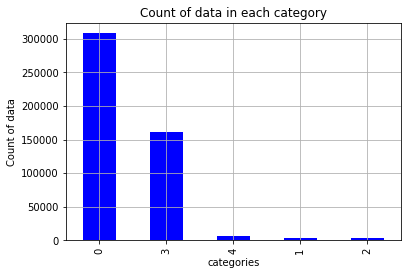

In [31]:
label_count.plot(kind='bar', color='blue')
plt.xlabel("categories")
plt.ylabel("Count of data")
plt.title("Count of data in each category")
plt.grid()

In [32]:
label_count

0    308053
3    160873
4      7301
1      4080
2      3871
Name: Target, dtype: int64

In [33]:
X.info()
print("------------------")
del X
del y

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691684 entries, 0 to 692691
Data columns (total 61 columns):
 Flow Duration                  691684 non-null int64
 Total Fwd Packets              691684 non-null int64
 Total Backward Packets         691684 non-null int64
Total Length of Fwd Packets     691684 non-null int64
 Total Length of Bwd Packets    691684 non-null int64
 Fwd Packet Length Max          691684 non-null int64
 Fwd Packet Length Min          691684 non-null int64
 Fwd Packet Length Mean         691684 non-null float64
 Fwd Packet Length Std          691684 non-null float64
Bwd Packet Length Max           691684 non-null int64
 Bwd Packet Length Min          691684 non-null int64
 Bwd Packet Length Mean         691684 non-null float64
 Bwd Packet Length Std          691684 non-null float64
Flow Bytes/s                    691684 non-null object
 Flow Packets/s                 691684 non-null object
 Flow IAT Mean                  691684 non-null float64
 Flow IAT Std

In [34]:
#problem of data imbalance?

In [35]:
#X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.9, random_state=21)

In [36]:
std_scaler = StandardScaler().fit(x_train)

#transform train and test set using standardization
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

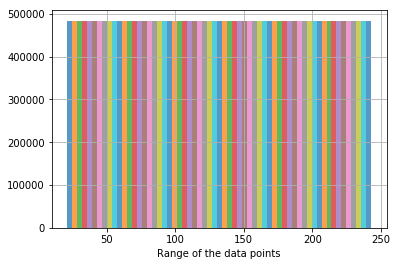

In [37]:
plt.hist(x_train_std, 1, alpha=0.75)
plt.xlabel('Range of the data points')
plt.grid(True)
plt.show()

In [38]:
#y_train = np.asarray(y_train, dtype='float64')
#y_test = np.asarray(y_test, dtype='float64')

In [39]:
hyper_optimal = {}


In [40]:
def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(clf, param_grid = {parameter: num_range}, scoring='f1_weighted', verbose=2)
    grid_search.fit(x_train, y_train.values)
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    print("adding parameter ", parameter)
    optimum = df.sort_values([0, 'index'], ascending=[0, 1])[:3]
    val = optimum['index']
    hyper_optimal[parameter] = val
    return plot, df

In [82]:
param_grid_ext = {"n_estimators": [100, 200, 300, 400, 500, 600, 700],
                "max_depth": np.arange(1, 30, 2),
                "min_samples_split": np.arange(2, 150, 5),
                "min_samples_leaf": np.arange(1, 100, 5),
                "max_leaf_nodes": np.arange(30, 50, 1),
                "min_weight_fraction_leaf": np.arange(0.1, 0.5, 0.2)
             }

In [ ]:
clf = RandomForestClassifier(n_jobs=-1, random_state = 74, class_weight="balanced")
index = 1
tuning_fig = plt.figure(figsize=(32,24))
for parameter, param_range in dict.items(param_grid_ext):
    evaluate_param(parameter, param_range, index)
    index += 1

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_leaf_nodes=30 ...............................................
[CV] ................................ max_leaf_nodes=30, total=   2.4s
[CV] max_leaf_nodes=30 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] ................................ max_leaf_nodes=30, total=   2.3s
[CV] max_leaf_nodes=30 ...............................................
[CV] ................................ max_leaf_nodes=30, total=   2.2s
[CV] max_leaf_nodes=31 ...............................................
[CV] ................................ max_leaf_nodes=31, total=   2.3s
[CV] max_leaf_nodes=31 ...............................................


In [ ]:
tuning_fig.savefig("rf_tuning.png")

In [89]:
hyper_optimal

{'max_depth': 13    27
 12    25
 14    29
 Name: index, dtype: int64, 'max_leaf_nodes': 17    49
 16    48
 15    47
 Name: index, dtype: int64, 'min_samples_leaf': 1     1
 4     6
 7    11
 Name: index, dtype: int64, 'min_samples_split': 4    12
 0     2
 2     7
 Name: index, dtype: int64, 'min_weight_fraction_leaf': 1    0.1
 0    0.3
 Name: index, dtype: float64, 'n_estimators': 3    400
 6    700
 4    500
 Name: index, dtype: int64}

In [90]:
param_dict = {}
for key in hyper_optimal.keys():
    param_dict[key] = hyper_optimal[key].tolist()

print(param_dict)

{'max_leaf_nodes': [49, 48, 47], 'min_samples_leaf': [1, 6, 11], 'n_estimators': [400, 700, 500], 'min_weight_fraction_leaf': [0.1, 0.30000000000000004], 'min_samples_split': [12, 2, 7], 'max_depth': [27, 25, 29]}


In [ ]:
#{'n_estimators': [386, 390, 382], 'max_leaf_nodes': [49, 48, 47], 'min_samples_leaf': [1, 2, 4]}
#{'max_leaf_nodes': [49, 48, 47], 'min_samples_leaf': [1, 6, 11], 'n_estimators': [400, 700, 500], 'min_weight_fraction_leaf': [0.1, 0.30000000000000004], 'min_samples_split': [12, 2, 7], 'max_depth': [27, 25, 29]}



In [94]:
grid_dict = {}
grid_dict['max_depth'] = [27, 26, 28]
grid_dict['n_estimators'] = [386, 387, 388, 389]
grid_dict['max_leaf_nodes'] = [49, 50]
grid_dict['min_samples_split'] = [11, 12, 13]


In [95]:
grid_dict

{'max_depth': [27, 26, 25],
 'max_leaf_nodes': [49, 50],
 'min_samples_split': [11, 12, 13],
 'n_estimators': [386, 387, 388, 389]}

In [96]:
clf = RandomForestClassifier(n_jobs=-1, random_state = 74, class_weight="balanced", min_weight_fraction_leaf=0.1, min_samples_leaf=1)


{'max_leaf_nodes': [49, 48, 47], 'min_samples_leaf': [1, 6, 11], 'n_estimators': [400, 700, 500], 'min_weight_fraction_leaf': [0.1, 0.30000000000000004], 'min_samples_split': [12, 2, 7], 'max_depth': [27, 25, 29]}


In [ ]:
clf

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.1,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=74,
            verbose=0, warm_start=False)

In [ ]:
%%time
grid_search = GridSearchCV(clf, param_grid=grid_dict, scoring='f1_weighted', verbose=2)
grid_search.fit(x_train, y_train.values)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] min_samples_split=11, max_leaf_nodes=49, n_estimators=386, max_depth=27 
[CV]  min_samples_split=11, max_leaf_nodes=49, n_estimators=386, max_depth=27, total=  32.0s
[CV] min_samples_split=11, max_leaf_nodes=49, n_estimators=386, max_depth=27 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.7s remaining:    0.0s


[CV]  min_samples_split=11, max_leaf_nodes=49, n_estimators=386, max_depth=27, total=  32.0s
[CV] min_samples_split=11, max_leaf_nodes=49, n_estimators=386, max_depth=27 
[CV]  min_samples_split=11, max_leaf_nodes=49, n_estimators=386, max_depth=27, total=  32.2s
[CV] min_samples_split=11, max_leaf_nodes=49, n_estimators=387, max_depth=27 
[CV]  min_samples_split=11, max_leaf_nodes=49, n_estimators=387, max_depth=27, total=  32.2s
[CV] min_samples_split=11, max_leaf_nodes=49, n_estimators=387, max_depth=27 
[CV]  min_samples_split=11, max_leaf_nodes=49, n_estimators=387, max_depth=27, total=  32.1s
[CV] min_samples_split=11, max_leaf_nodes=49, n_estimators=387, max_depth=27 
[CV]  min_samples_split=11, max_leaf_nodes=49, n_estimators=387, max_depth=27, total=  32.5s
[CV] min_samples_split=11, max_leaf_nodes=49, n_estimators=388, max_depth=27 
[CV]  min_samples_split=11, max_leaf_nodes=49, n_estimators=388, max_depth=27, total=  32.3s
[CV] min_samples_split=11, max_leaf_nodes=49, n_esti

In [104]:
clf

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.1,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=74,
            verbose=0, warm_start=False)

In [105]:
param_dict

{'max_depth': [27, 25, 29],
 'max_leaf_nodes': [49, 48, 47],
 'min_samples_leaf': [1, 6, 11],
 'min_samples_split': [12, 2, 7],
 'min_weight_fraction_leaf': [0.1, 0.30000000000000004],
 'n_estimators': [400, 700, 500]}

In [106]:
from operator import itemgetter
optimal_parameters = sorted(grid_search.grid_scores_, key=itemgetter(1), reverse=True)[:5][0][0]
optimal_parameters

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


{'max_depth': 27,
 'max_leaf_nodes': 49,
 'min_samples_split': 11,
 'n_estimators': 387}

In [108]:
random_forest = RandomForestClassifier(n_jobs=-1, random_state=74, class_weight="balanced",
                                       min_samples_leaf=1,
                                       min_samples_split=optimal_parameters['min_samples_split'],
                                       min_weight_fraction_leaf=0.1,
                                       max_leaf_nodes=optimal_parameters['max_leaf_nodes'],
                                       max_depth=optimal_parameters['max_depth'],
                                       n_estimators=optimal_parameters['n_estimators'])

In [109]:
random_forest

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=27, max_features='auto',
            max_leaf_nodes=49, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=11, min_weight_fraction_leaf=0.1,
            n_estimators=387, n_jobs=-1, oob_score=False, random_state=74,
            verbose=0, warm_start=False)

In [110]:
random_forest_classifier = random_forest.fit(x_train, y_train.values)

In [124]:
importances = random_forest_classifier.feature_importances_

In [115]:
print(classification_report(y_test.values, random_forest.predict(x_test)))

             precision    recall  f1-score   support

          0       0.99      0.81      0.89    131919
          1       0.23      0.87      0.37      1716
          2       0.78      0.68      0.73      1628
          3       0.83      0.92      0.87     69251
          4       0.20      0.92      0.32      2992

avg / total       0.91      0.85      0.87    207506



In [116]:
def leaning_curve_plot(estimator, X, y, cv):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Traning Example")
    plt.ylabel("Score")
    plt.grid()
    
    # compute mean and standard deviation
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # fill_between 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    # plotting 
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Trainig score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross Validation score")

    plt.legend(loc="best")
    
    return plt

In [ ]:
from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(int(len(x_train_std)), n_iter=10, random_state=21, test_size=0.2)
plt = leaning_curve_plot(random_forest, x_train_std, y_train.values, cv)
plt.savefig("rf_learning.png")

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [ ]:
print(importances)

In [122]:
import cPickle

In [127]:
with open('random_forest', 'wb') as f:
    cPickle.dump(random_forest, f)


In [128]:
with open('random_forest', 'rb') as f:
    rf = cPickle.load(f)


In [129]:
print(classification_report(y_test.values, rf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.99      0.81      0.89    131919
          1       0.23      0.87      0.37      1716
          2       0.78      0.68      0.73      1628
          3       0.83      0.92      0.87     69251
          4       0.20      0.92      0.32      2992

avg / total       0.91      0.85      0.87    207506

